In [31]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [34]:
def convolve_im(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    ###FUNCTION TO VISUALIZE COMPLEX ARRAYS
    def complex_imshow(fft_im):
        fft_abs = np.abs(fft_im)
        c = 255/(np.log(1+np.max(fft_abs)))
        f = c*np.log(1+fft_abs)
        plt.imshow(f, cmap="gray")
    #SPATIAL TO FREQUENCY DOMAIN (Image)
    fft_im = np.fft.fft2(im)
    #CENTER SHIFT
    fft_im_shift = np.fft.fftshift(fft_im)
    #KERNEL INVERSE SHIFT
    fft_kernel = np.fft.ifftshift(fft_kernel)
    #FFT CONV
    fft_im_conv = fft_im_shift * fft_kernel
    #FFT INVERSE SHIFT
    fft_im_conv_shift = np.fft.ifftshift(fft_im_conv)
    #FREQUENCY DOMAIN TO SPATIAL DOMAIN(CONV Image)
    im_conv = np.fft.ifft2(fft_im_conv_shift)
    conv_result = im_conv
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        # Visualize FFT
        plt.subplot(1, 5, 2)
        complex_imshow(fft_im_shift)
        # Visualize FFT kernel
        plt.subplot(1, 5, 3)
        complex_imshow(fft_kernel)
        # Visualize filtered FFT image
        plt.subplot(1, 5, 4)
        complex_imshow(fft_im_conv)
        # Visualize filtered spatial image
        plt.subplot(1, 5, 5)
        complex_imshow(conv_result)

    ### END YOUR CODE HERE ###
    return conv_result

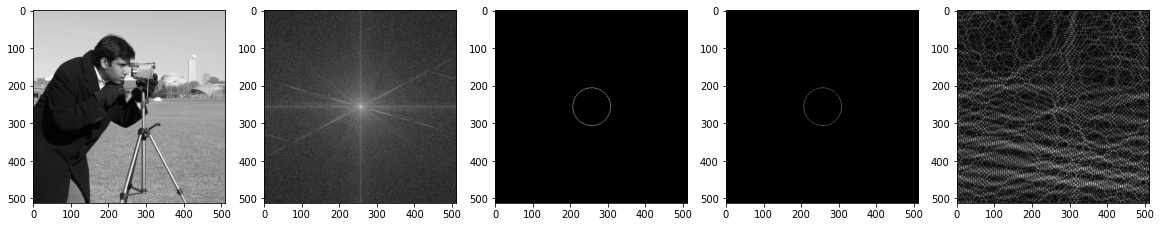

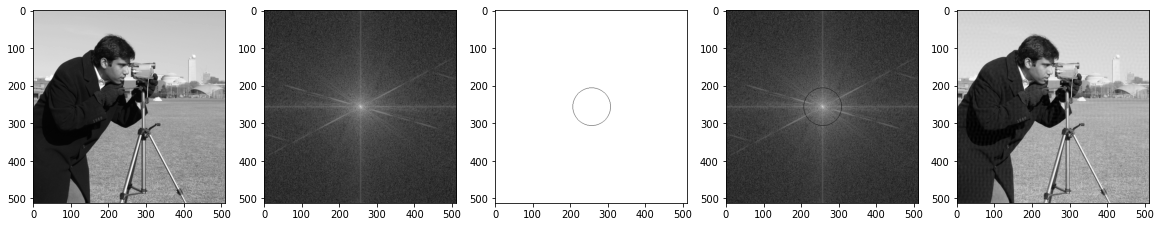

Saving image to: image_processed/camera_low_pass.png
Saving image to: image_processed/camera_high_pass.png


In [35]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)